# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [106]:
class MyKmeans():
    def __init__(
        self,
        k=2,
        metric='euclidean',
        max_iter=1000,
        random_state=None,
        init='random',
        eps=1e-3,
    ):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.eps = eps
        self.initMethod = init

    def initCentroidsKmeanPlusPlus(self, X):
        centroids = np.empty((self.k, X.shape[1]))
        centroids[0] = np.random.permutation(X)[0]
        for centrId in range(1, self.k):
            arrDist = np.power(
                np.min(cdist(X, centroids[:centrId], self.metric), axis=1), 2
            )
            rnd = np.random.uniform(0, 1) * np.sum(arrDist)
            curSum = 0
            centroids[centrId] = X[np.searchsorted(np.cumsum(arrDist), rnd)]
        return centroids

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        # Массив с центройдами кластеров
        # Your Code Here
        self.centroids = prev_centroids = np.random.random_sample(
            (self.k, X.shape[1])
        ) if self.initMethod != 'k-means'
        else self.initCentroidsKmeanPlusPlus(X)
        for iteration in range(self.max_iter):
            arrDist = cdist(X, prev_centroids, self.metric)
            classes = np.argmin(arrDist, axis=1)
            self.centroids = np.array(
                [X[classes == k].mean(axis=0) for k in range(self.k)]
            )
            if np.linalg.norm(
                cdist(self.centroids, prev_centroids, self.metric)
            ) <= self.eps:
                break
            else:
                prev_centroids = self.centroids
        return self

    def fit_predict(self, X, y=None):  # y игнорируется
        self.fit(X)
        result = self.predict(X)
        return result

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """

        return np.argmin(cdist(X, self.centroids, self.metric), axis=1)


In [86]:
class MiniBatchKMeans(KMeans):
    def __init__(
        self,
        k=2,
        metric='euclidean',
        max_iter=1000,
        random_state=None,
        init='random',
        eps=1e-3,
        batch_size=2,
    ):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.eps = eps
        self.initMethod = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        # Массив с центройдами кластеров
        self.centroids = prev_centroids = np.random.random_sample(
            (self.k, X.shape[1])
        ) if self.initMethod != 'k-means'
        else self.initCentroidsKmeanPlusPlus(X)
        countDict = defaultdict(int)
        for iteration in range(self.max_iter):
            batchIndexes = np.random.choice(X.shape[0], self.batch_size)
            nearClassId = np.argmin(
                cdist(X[batchIndexes], prev_centroids, self.metric), axis=1
            )
            for idx, batchIdx in enumerate(batchIndexes):
                countDict[nearClassId[idx]] += 1
                k = 1.0 / countDict[nearClassId[idx]]
                self.centroids[
                    nearClassId[idx]
                ] = (
                    1 - k
                    ) * self.centroids[nearClassId[idx]] + k * X[batchIdx]
            if np.linalg.norm(
                cdist(self.centroids, prev_centroids, self.metric)
            ) <= self.eps:
                break
            else:
                prev_centroids = self.centroids
        return self


### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [39]:
from sklearn.datasets import make_blobs

In [40]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

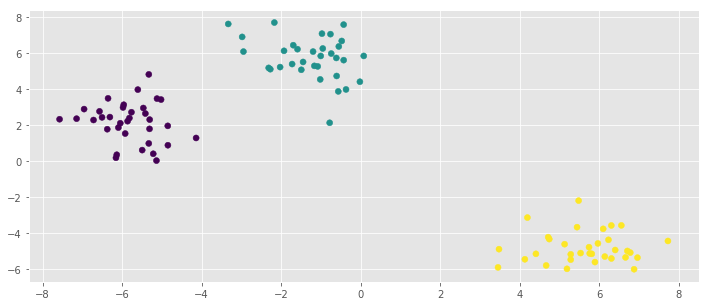

In [41]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

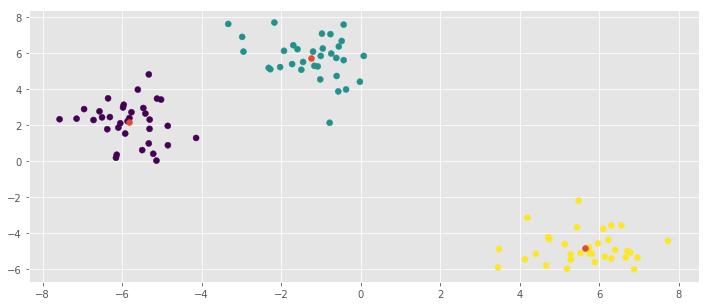

In [51]:
## Работоспособность MyKmeans
kmeans = MyKmeans(k=3)

kmeans.fit(X)

plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

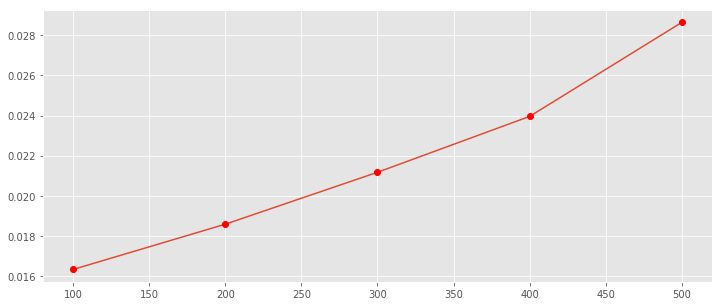

In [107]:
import time
n_samples = [100, 200, 300, 400, 500]
blobs = []
for n in n_samples:
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    blobs.append(X)
n_time = []
for i in range(5):
    begin = time.clock()
    MyKmeans(k = 3).fit_predict(blobs[i])
    end = time.clock()
    min_time = end - begin
    for j in range(1, 5):
        begin = time.clock()
        MyKmeans(k = 3).fit_predict(blobs[i])
        end = time.clock()
        if end - begin < min_time:
            min_time = end - begin
    n_time.append(min_time)
plt.plot(n_samples, n_time, n_samples, n_time, 'ro')
plt.show()

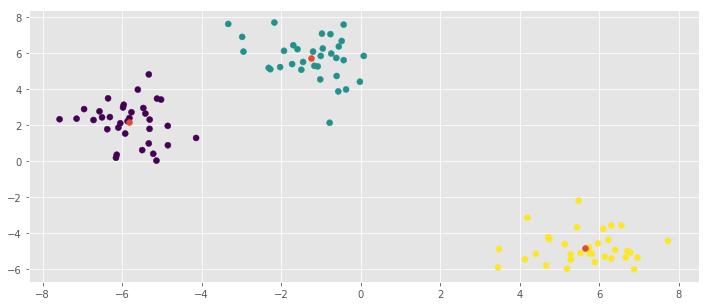

In [52]:
## Работоспособность MyKmeans++
kmeans = MyKmeans(k=3, init='k-means')

kmeans.fit(X)

plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

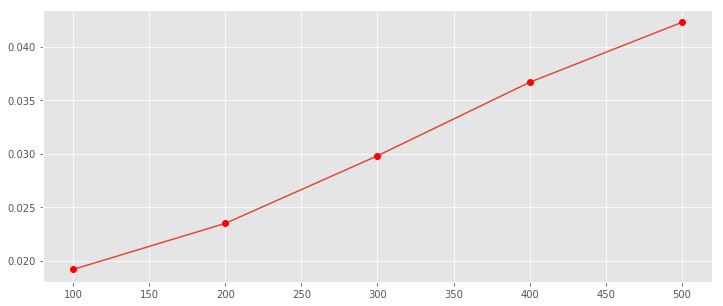

In [108]:
import time
n_samples = [100, 200, 300, 400, 500]
blobs = []
for n in n_samples:
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    blobs.append(X)
n_time = []
for i in range(5):
    begin = time.clock()
    MyKmeans(k = 3, init = 'k-means').fit(blobs[i]).predict(blobs[i])
    end = time.clock()
    min_time = end - begin
    for j in range(1, 5):
        begin = time.clock()
        MyKmeans(k = 3, init = 'k-means').fit(blobs[i]).predict(blobs[i])
        end = time.clock()
        if end - begin < min_time:
            min_time = end - begin
    n_time.append(min_time)
plt.plot(n_samples, n_time, n_samples, n_time, 'ro')
plt.show()

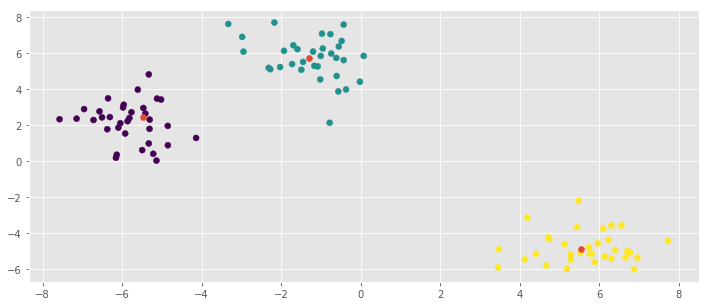

In [55]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
kmeans = MiniBatchKMeans(k=3)

kmeans.fit(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1])

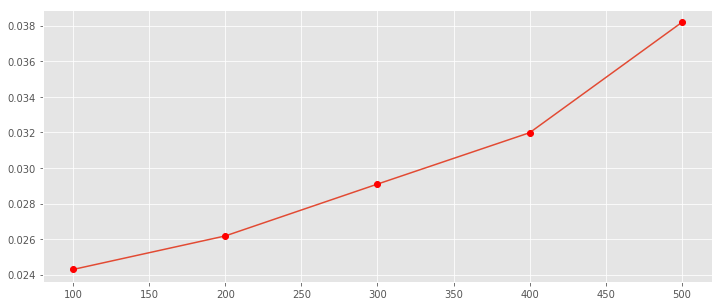

In [109]:
import time
n_samples = [100, 200, 300, 400, 500]
blobs = []
for n in n_samples:
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    blobs.append(X)
n_time = []
for i in range(5):
    begin = time.clock()
    MiniBatchKMeans(k = 3).fit(blobs[i]).predict(blobs[i])
    end = time.clock()
    min_time = end - begin
    for j in range(1, 5):
        begin = time.clock()
        MiniBatchKMeans(k = 3).fit(blobs[i]).predict(blobs[i])
        end = time.clock()
        if end - begin < min_time:
            min_time = end - begin
    n_time.append(min_time)
plt.plot(n_samples, n_time, n_samples, n_time, 'ro')
plt.show()

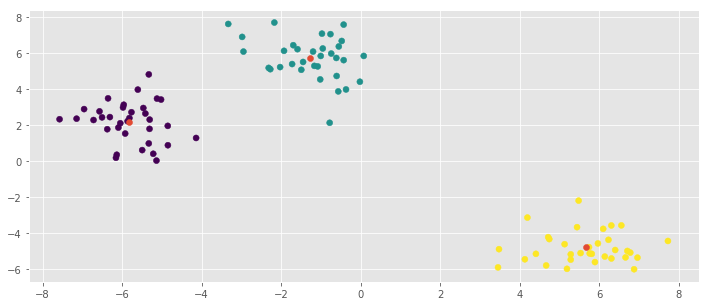

In [59]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
model = MiniBatchKMeans(k=3, init='k-means')
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(model.centroids[:,0],model.centroids[:,1])


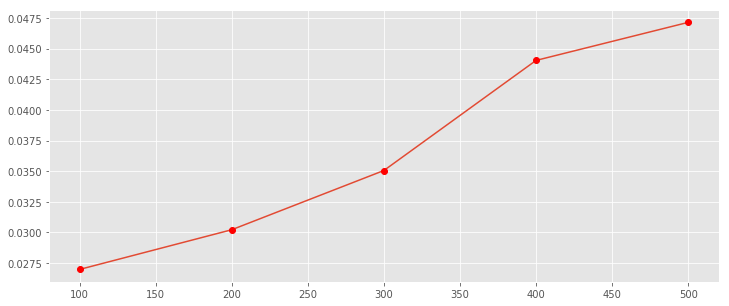

In [110]:
import time
n_samples = [100, 200, 300, 400, 500]
blobs = []
for n in n_samples:
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    blobs.append(X)
n_time = []
for i in range(5):
    begin = time.clock()
    MiniBatchKMeans(k = 3, init = 'k-means').fit(blobs[i]).predict(blobs[i])
    end = time.clock()
    min_time = end - begin
    for j in range(1, 5):
        begin = time.clock()
        MiniBatchKMeans(k = 3, init = 'k-means').fit(blobs[i]).predict(blobs[i])
        end = time.clock()
        if end - begin < min_time:
            min_time = end - begin
    n_time.append(min_time)
plt.plot(n_samples, n_time, n_samples, n_time, 'ro')
plt.show()

In [78]:
## Время выполнения алгоритма Kmeans из sklearn
import sklearn.cluster as sc
%timeit sc.KMeans(n_clusters = 3, init = 'random').fit_predict(X)

9.33 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
## Время выполнения алгоритма MyKmeans
%timeit MyKmeans(k = 3).fit_predict(X)

9.08 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
## Время выполнения алгоритма MyKmeans++
%timeit MyKmeans(k = 3, init = 'k-means').fit_predict(X)

11.7 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
%timeit MiniBatchKMeans(k = 3, init = 'random').fit_predict(X)

8.06 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
%timeit MiniBatchKMeans(k = 3, init = 'k-means').fit_predict(X)

9.49 ms ± 509 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [111]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [113]:
df_sns = df_sns.drop(df_sns.columns[[0, 1, 2]], axis=1)
df_sns = (df_sns-df_sns.mean())/df_sns.std()

In [114]:
df_sns_np=df_sns.values

In [116]:
## MyKMeans
model = MyKmeans(k=9)
result = model.fit(df_sns_np)
print(df_sns.columns[(result.centroids.copy()).argsort()[:,::-1][:,:3]])

Index([['dress', 'dance', 'shopping'], ['kissed', 'drugs', 'hair'],
       ['marching', 'band', 'music'], ['hollister', 'abercrombie', 'shopping'],
       ['shopping', 'basketball', 'football'],
       ['soccer', 'sports', 'football'], ['blonde', 'jesus', 'death'],
       ['bible', 'jesus', 'god'], ['tennis', 'sports', 'church']],
      dtype='object')


In [117]:
## MyKMeans++
model = MyKmeans(k=9,init='k-means')
result = model.fit(df_sns_np)
print(df_sns.columns[(result.centroids.copy()).argsort()[:,::-1][:,:3]])

Index([['drunk', 'drugs', 'die'], ['kissed', 'sex', 'hair'],
       ['shopping', 'cute', 'mall'], ['blonde', 'tennis', 'jesus'],
       ['basketball', 'football', 'baseball'], ['bible', 'jesus', 'god'],
       ['hot', 'cute', 'mall'], ['hollister', 'abercrombie', 'shopping'],
       ['marching', 'band', 'music']],
      dtype='object')


In [119]:
## MyKMeans с MiniBatchMyKMeans
model = MiniBatchKMeans(k=9)
result = model.fit(df_sns_np)
print(df_sns.columns[(result.centroids.copy()).argsort()[:,::-1][:,:3]])


Index([['soccer', 'volleyball', 'abercrombie'],
       ['tennis', 'shopping', 'hollister'], ['jesus', 'bible', 'god'],
       ['kissed', 'hair', 'drugs'], ['marching', 'band', 'death'],
       ['cheerleading', 'drugs', 'cute'], ['blonde', 'sex', 'death'],
       ['rock', 'music', 'soccer'], ['die', 'clothes', 'basketball']],
      dtype='object')


In [120]:
## MyKMeans++ с MiniBatchMyKMeans
model = MiniBatchKMeans(k=9, init="k-means")
result = model.fit(df_sns_np)
print(df_sns.columns[(result.centroids.copy()).argsort()[:,::-1][:,:3]])

Index([['dress', 'mall', 'hair'], ['marching', 'tennis', 'band'],
       ['kissed', 'hair', 'sex'], ['basketball', 'football', 'sports'],
       ['jesus', 'bible', 'god'], ['soccer', 'basketball', 'shopping'],
       ['abercrombie', 'hollister', 'shopping'], ['blonde', 'sex', 'drunk'],
       ['sports', 'friends', 'death']],
      dtype='object')


In [ ]:
#Вывод
Исходя из скорости настройки кластеров + качества кластеризации, я за MiniBatchKmeans.
Т.к. качество кластеризация не значительно отличается от MiniBatchKmeans++, но по скорости простой MiniBatchKmeans выигрывает